### Welcome. 

### Take a deep breath and get ready for some very nicely organized code and a very important cat.

### This is an image to sound research project that uses deep learning convolutional neural networks for audio synthesis. It is named nemesis because that's what google suggested when I searched "What is one word for 'the bane of my life'".

==========================================================================================================================================================================================

#### First, let's import all the libraries we need and get our image data in to set ourselves up for success

2023-12-06 02:14:29.893178: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


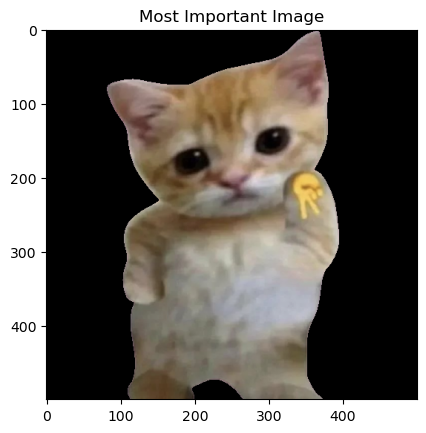

In [1]:
#Import Libraries
import cv2
import numpy as np
import missingno as msn
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import Popen
import subprocess as sp
import os

import sys

import IPython.display as ipd

#Import Image
image_path = 'mostimportant.png'  
image = cv2.imread(image_path)
new_image = image
new_image = cv2.resize(new_image, (32, 32)) 
new_image = new_image / 255.0  # Normalize pixel values

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.title('Most Important Image')
plt.show()

#### Now let's create our CNN model from scratch. Below, we're creating a very simple neural network with 3 convolutional layers and ReLu activation

In [2]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(16, kernel_size=(5, 5), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))

model.add(Flatten())

model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#### Now, we'll training the model using CIFAR-10 dataset from tensorflow

In [3]:
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize pixel values
x_dev = x_dev / 255.0
x_test = x_test / 255.0

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [4]:
# Train the model

model.fit(x_dev, y_dev, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 41s 32ms/step - loss: 1.5566 - accuracy: 0.4354 - val_loss: 1.3559 - val_accuracy: 0.5119
Epoch 2/10
1250/1250 [==============================] - 42s 33ms/step - loss: 1.2070 - accuracy: 0.5704 - val_loss: 1.1347 - val_accuracy: 0.5969
Epoch 3/10
1250/1250 [==============================] - 42s 34ms/step - loss: 1.0280 - accuracy: 0.6371 - val_loss: 1.0557 - val_accuracy: 0.6307
Epoch 4/10
1250/1250 [==============================] - 42s 34ms/step - loss: 0.8810 - accuracy: 0.6907 - val_loss: 1.0623 - val_accuracy: 0.6307
Epoch 5/10
1250/1250 [==============================] - 42s 34ms/step - loss: 0.7554 - accuracy: 0.7350 - val_loss: 1.0423 - val_accuracy: 0.6465
Epoch 6/10
1250/1250 [==============================] - 42s 34ms/step - loss: 0.6359 - accuracy: 0.7760 - val_loss: 1.0654 - val_accuracy: 0.6582
Epoch 7/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.5168 - accuracy: 0.8191 - val_loss: 1.1319 -

In [5]:
# Save model for future use

model.save('nemesis_model.h5')

/Users/vanshmurad/opt/anaconda3/envs/datamovies/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Now that we have our CNN model, let's use it on the image that we imported in the beginning. Then, let's look at the activations and visualize each layer to determine what is best representative of our image

#### Note: the way CNNs work is that each layer tries to learn more than the layer before by minimizing a loss function. 

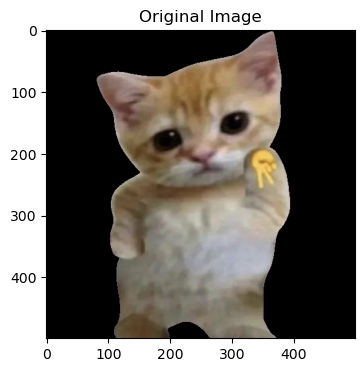

1/1 [==============================] - 0s 136ms/step


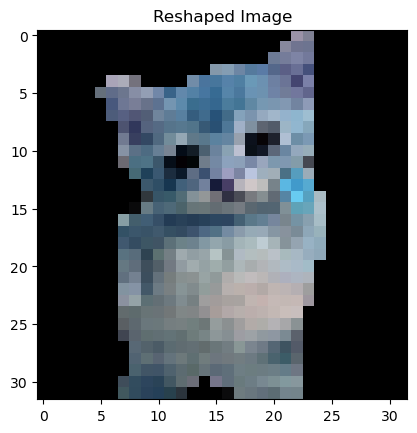

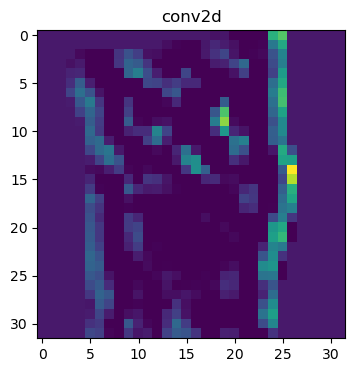

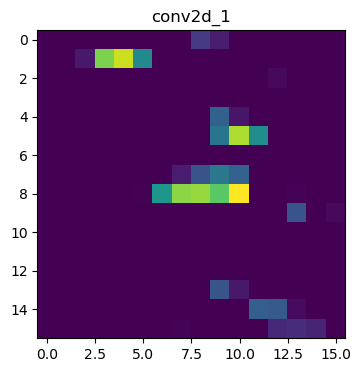

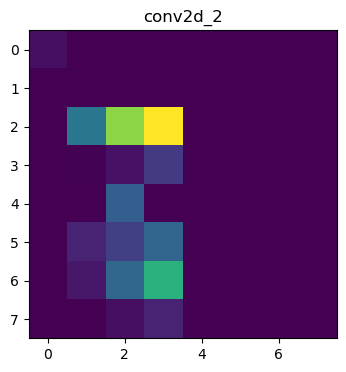

In [6]:
# Display the original image
plt.figure(figsize=(4, 4))
#plt.imshow(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.title('Original Image')
plt.show()

plt.imshow(new_image)

plt.title('Reshaped Image')

# Model to get the output of each layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

new_image_batch = np.expand_dims(new_image, axis=0)

# Get the activations for each layer
activations = activation_model.predict(new_image_batch)

# Visualize the output of each layer
layer_names = [layer.name for layer in model.layers]

for layer_name, layer_activation in zip(layer_names, activations):
    if 'conv2d' in layer_name.lower():  # Display only Conv2D layers
        plt.figure(figsize=(4, 4))
        plt.imshow(layer_activation[0, :, :, 0], cmap='viridis')  # Display the first channel of the feature map
        plt.title(layer_name)
        plt.show()


#### From the above charts, we can see that the model is able to learn and predict most of the important information from the image in the first layer activations itself and then uses the latter layers to try and understand any other features or patterns. If we were doing a classification task, this is where the latter layers would come handy. 

#### However, we're interested in using the activations from first layer for sound synthesis.

In [7]:
activations

[array([[[[0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971],
          [0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971],
          [0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971],
          ...,
          [0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971],
          [0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971],
          [0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971]],
 
         [[0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971],
          [0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971],
          [0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971],
          ...,
          [0.11449458, 0.05345902, 0.        , 0.02261377, 0.04806709,
           0.05160971],
          [0.1144

In [8]:
len(activations)

8

#### The above shows us that activations is a list of 8 arrays, representing activations from each layer of our CNN model. Now let's do some initial exploratory data analysis on this.

In [9]:
# Flatten each 4D tensor into a 1D array
flattened_activations = [arr.flatten() for arr in activations]

df_activations = pd.DataFrame(flattened_activations)

df_activations = pd.DataFrame.transpose(df_activations)

df_activations

,0,1,2,3,4,5,6,7
0,0.114495,0.114495,0.000000,0.000000,0.093742,0.093742,0.000000,1.795308e-04
1,0.053459,0.053459,0.000000,0.463725,0.000000,0.000000,0.000000,2.812907e-07
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.960543e-04
3,0.022614,0.022614,0.091878,0.403022,0.000000,0.000000,0.000000,1.414742e-01
4,0.048067,0.048067,0.000000,0.000000,0.000000,0.000000,7.677355,1.019854e-07
...,...,...,...,...,...,...,...,...
7675,NaN,NaN,NaN,NaN,0.977259,0.977259,NaN,NaN
7676,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
7677,NaN,NaN,NaN,NaN,2.298503,2.298503,NaN,NaN
7678,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN


<AxesSubplot: >

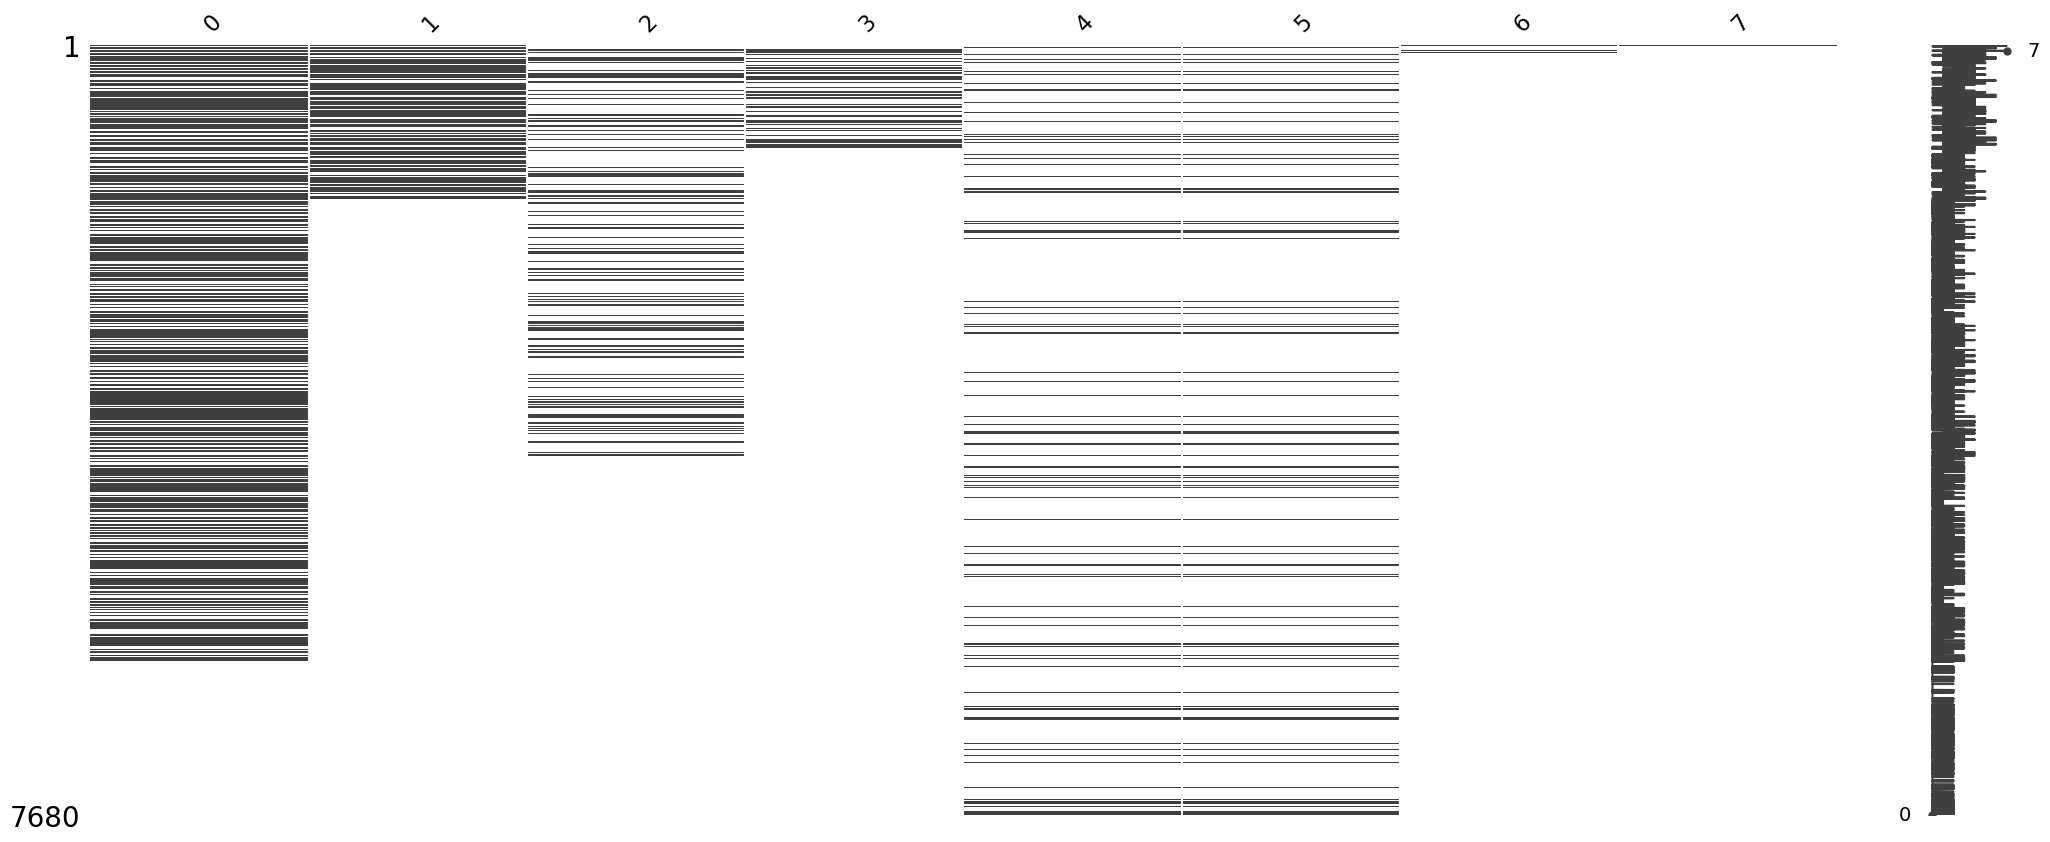

In [10]:
#Removing exteme 0 and 1 values

df_activations.replace(0.000000, np.nan, inplace=True)
df_activations.replace(1.000000, np.nan, inplace=True)

msn.matrix(df_activations)

#### The above represents missing values or 0 values from the dataset after removing all the 0 and 1 values. 

#### Now, let's separate our first convolutional layer into a separate dataframe.

In [11]:
df_activations_sub = pd.DataFrame(df_activations[0])
df_activations_sub

,0
0,0.114495
1,0.053459
2,NaN
3,0.022614
4,0.048067
...,...
7675,NaN
7676,NaN
7677,NaN
7678,NaN


In [12]:
df_activations_sub = df_activations_sub.dropna()
df_activations_sub = pd.DataFrame(df_activations_sub)

df_activations_sub

,0
0,0.114495
1,0.053459
3,0.022614
4,0.048067
5,0.051610
...,...
6138,0.114495
6139,0.053459
6141,0.022614
6142,0.048067


Text(0.5, 1.0, 'Range of Activations')

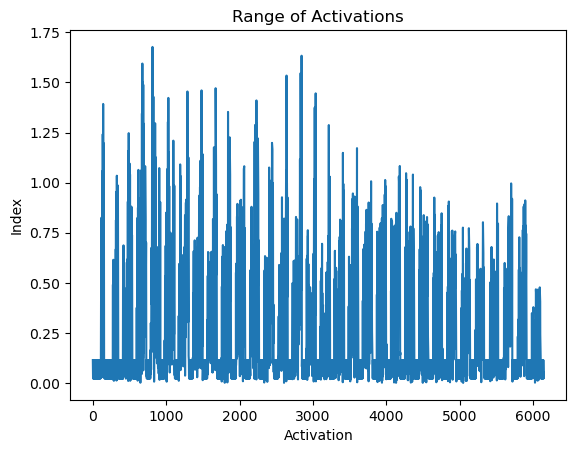

In [13]:
# Plotting a line chart to show our activation distribution

df_activations_sub[df_activations_sub.columns[0]].plot(kind='line')

plt.xlabel('Activation')  
plt.ylabel('Index') 
plt.title('Range of Activations')



#### Now this looks like something we can sonify, right?

In [28]:
act_array = df_activations_sub.to_numpy()

freq = np.interp(act_array, np.linspace(0, 1, 10), np.linspace(400, 600, 10))

In [29]:
print(len(freq))
freq = freq[::7] #You can potentially remove this downsizing step, depending on the processing power you have
print(len(freq))


3824
547


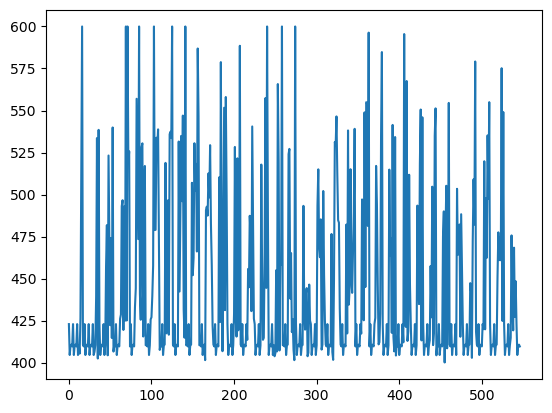

In [30]:
plt.plot(freq)

In [31]:
freq_flat = freq.flatten()

In [18]:
# define the function for making the ENVELOPE
#  peak position [0,1] 
def make_envelope_3pt(y,peak_posn):
    N = len(y)
    envelope = np.zeros(N)
    #print(envelope.shape)
    peak = int(N*peak_posn)
    #print(peak)

    # from 0 to the peak index (peak):
    up = np.linspace(0,1,peak)
    #print(up.shape)
    envelope[:peak] = up

    # and fill in the rest: 
    down = np.linspace(1,0,(N-peak))
    #print(down.shape)
    envelope[peak:] = down
    
    return envelope

In [19]:
# define the function for MAKING THE BEEP, then taking in the envelope
# inputs f, dur

def make_oscillator(f,dur):
    n_cycles = f*dur # [cycles/sec]*[sec]
    fs = 44100 # just make it at 44100.. why not?! 
    npts = int(fs*dur)
    
    time = np.linspace(0,dur,npts)
    env = np.interp(time, [0,0.1*dur,0.4*dur,dur], [0,1,0.4,0])
    x = np.linspace(0,2*np.pi*n_cycles,npts)
    y = np.sin(x)
    y = env*y
    return time,y

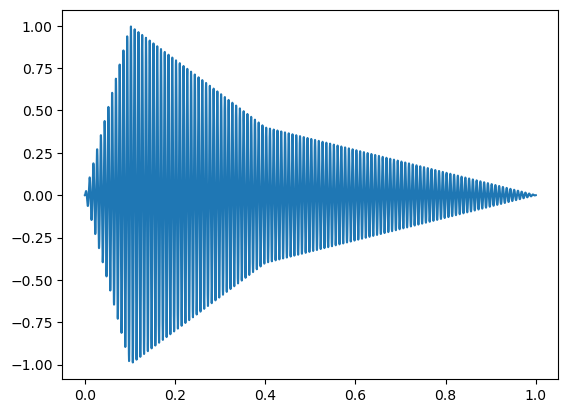

In [20]:
f = 120.0
dur = 1.0
time,y = make_oscillator(f,dur)
plt.plot(time,y)

In [32]:
dur = 0.05

waveform = np.sin(2 * np.pi * f * dur)
for ff in freq_flat:
    time,y = make_oscillator(ff,dur)
    beep = y
    waveform = np.hstack((waveform,beep))

In [43]:
fs_sound = 44100

ipd.Audio(waveform, rate=fs_sound) 